# Peak Detection
This notebook is made for detecting peaks of the snippets extracted in module 2 using the function defined in x


In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pyarrow.feather as feather
from tqdm import tqdm

In [49]:
%run "Functions_peakdetection.ipynb"

In [50]:
#root = 'G:\My Drive\Molecool\Databases\Database1'
root = '/Volumes/GoogleDrive/.shortcut-targets-by-id/1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD/Molecool/Databases/Database1' # Jaume's directoru

In [51]:
patients = sorted(os.listdir(root))

for pat in tqdm(patients): #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini','\r')):
        path_pat = root+'/'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini') and folder != 'Icon\r':
                path_folder = path_pat + '/' +folder   
                snippets = sorted(os.listdir(path_folder))
                samplingRate = find_rate(path_folder)
                for snip_folder in snippets:  #Looping through the snippet folders
                    if not snip_folder.endswith(('.json', '.ftr', '.ini','\r')):
                        path_snip =path_folder + '/' + snip_folder
                        read_meta(path_snip)
                        read_peaks(path_snip, samplingRate)
     

100%|███████████████████████████████████████████| 57/57 [02:02<00:00,  2.15s/it]


In [52]:
def read_peaks(path,rate):
    """Function to open snippet files, get peaks, and write them to a new file"""
    df = pd.read_feather(path_snip + '/MSNIP.ftr')   #inputting the ecg feather files in a data frame
    df_peaks = _filteringdetpeak(df['ecg_0'],rate)
    feather.write_feather(df_peaks, (path_snip + '/PEAKS.ftr'))

In [53]:
def read_meta(path):
    """Function that creates a new meta file for peak files"""
#     with open(path + '\ManualMeta.json') as json_file:
#         metaData = json.load(json_file)
#         json_file.close()
    data = {'Error Flag': False, 'Error Type': 'No error'}
    with open((path + '/PeakMeta.json'), "w") as outfile:
        json.dump(data, outfile)
        outfile.close()

In [54]:
def find_rate(path):
    """"""
    with open(path + '/Meta.json') as json_file:
        metaData = json.load(json_file)
        json_file.close()
        return int(metaData['Sampling rate'])

  0%|                                                    | 0/57 [00:00<?, ?it/s]

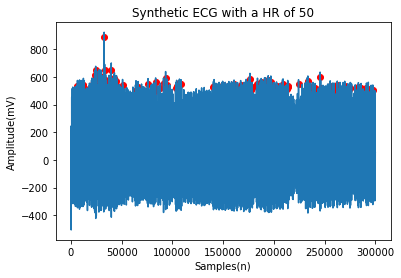

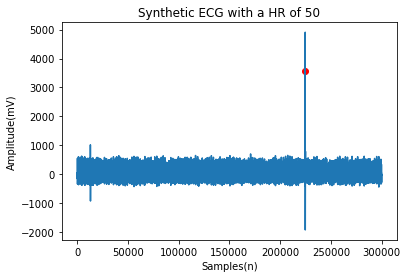

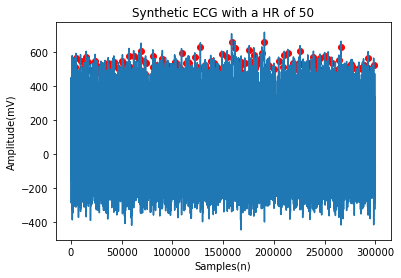

  5%|██▎                                         | 3/57 [00:00<00:14,  3.63it/s]

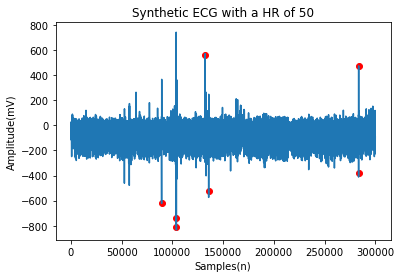

  9%|███▊                                        | 5/57 [00:01<00:11,  4.45it/s]

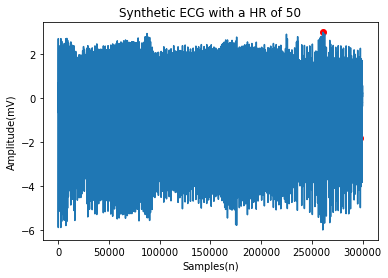

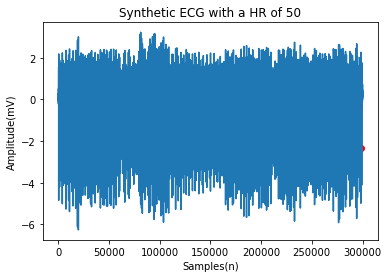

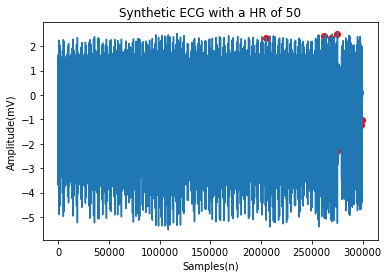

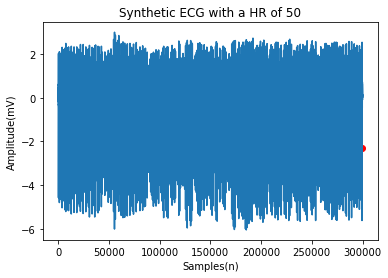

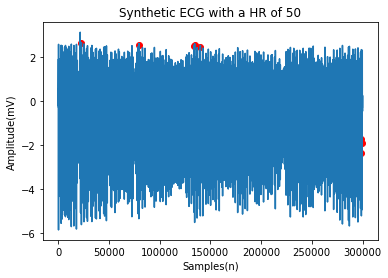

 12%|█████▍                                      | 7/57 [00:02<00:22,  2.25it/s]

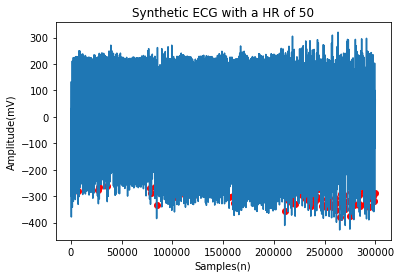

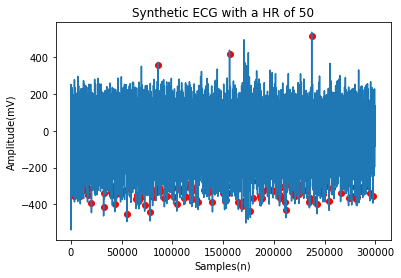

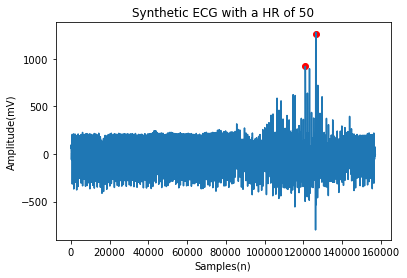

 14%|██████▏                                     | 8/57 [00:03<00:25,  1.94it/s]

In [ ]:
# Check to see the state of the peaks
patients = sorted(os.listdir(root))
for pat in tqdm(patients):     #Looping throught the folder Sxxxx
    if not pat.endswith(('.json', 'ini','\r')):
        path_pat = root+'/'+pat
        folders = sorted(os.listdir(path_pat))
        for folder in folders:    #Looping through the different ecg types 
            if not folder.endswith('.ini') and folder != 'Icon\r':
                path_folder = path_pat + '/' +folder   
                snippets = sorted(os.listdir(path_folder))
                samplingRate = find_rate(path_folder)
                for snip_folder in snippets:  #Looping through the snippet folders
                    if not snip_folder.endswith(('.json', '.ftr', '.ini','\r')):
                        path_snip =path_folder + '/' + snip_folder
                        df = pd.read_feather(path_snip + '/MSNIP.ftr')
                        df_signal = df['ecg_0']
                        df_peaks = pd.read_feather(path_snip + '/PEAKS.ftr')
                    
                        #print(y_values)
                        #print(df_peaks[df_peaks['x_values'] < 5000])

                        plt.plot(df_signal)
                        plt.title('Synthetic ECG with a HR of 50')
                        plt.xlabel('Samples(n)')
                        plt.ylabel('Amplitude(mV)')
                        plt.scatter(df_peaks['x_values'],df_peaks['y_values'], marker='o',c='red')
                        plt.show()